                                                        Natalia Brzozowska
# Labolatorium 2
## Interpolacja


### Zadanie 1
     a) Narysuj funkcje f(x) oraz pn(x) 



In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f_x(x):
    return 1 / (1 + x ** 2)


def van_array(n):
    xs = np.linspace((-5), 5, n + 1)
    ys = []
    for i in xs:
        ys.append(f_x(i))

    array = np.vander(xs, n + 1, True)
    an = np.linalg.solve(array, ys)
    return an


def pn_x(x, an, n):
    return np.dot(np.vander(x, n+1, True), an)


def inter_plot(n):
    xs = np.linspace((-5), 5, 1000)

    an = van_array(n)

    plt.plot(xs, f_x(xs))
    plt.plot(xs, pn_x(xs, an, n))
    plt.title('Output Function')
    plt.show()


    Na wykresach niebieskim kolorem jest zaznaczona funkcja f(x), pomarańczowym p(x), a zielonym reszta.

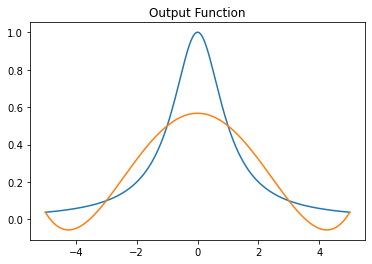

In [4]:
inter_plot(5)

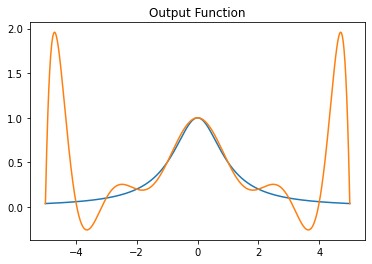

In [5]:
inter_plot(10)

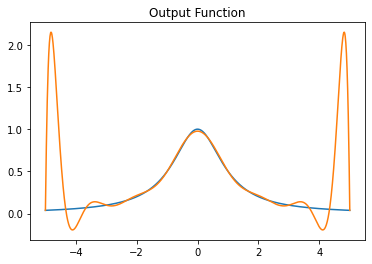

In [6]:
inter_plot(15)

    b) Wylicz i narysuj reszty interpolacji (x) = f(x) − pn(x) w 30 równoodległych punktach powyższego przedziału.

In [10]:
def f2(x, a, n):
    return f_x(x)-pn_x(x, a, n)


def rest(n):
    xs = np.linspace((-5), 5, 1000)

    an = van_array(n)
    plt.plot(xs, f_x(xs))
    plt.plot(xs, pn_x(xs, an, n))
    plt.plot(xs, f2(xs, an, n))
    plt.show()

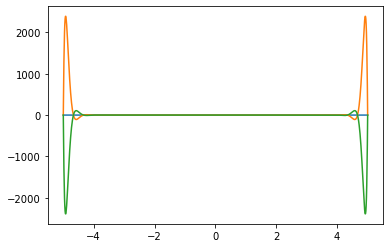

In [11]:
rest(30)

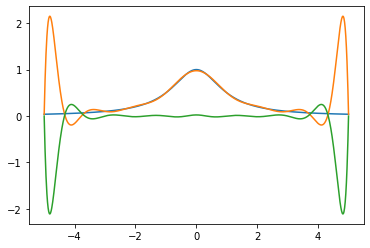

In [12]:
rest(15)

    Na wykresach narysowanych dla 15 punktów lepiej widać zależności, które chcemy skomentować.
    Można zaobserowować,że zielony wykres, rzeczywiście wyznacza różnicy między funkcjami f(x) i p(x).

### Zadanie 2
    Dla danej funkcji i przedziału z poprzedniego zadania oraz n = 15 znajdź wielomian interpolacyjny w węzłach Czebyszewa, gdzie k = 1, .., n, a a, b są odpowiednio początkiem i końcem przedziału interpolacji.
    Narysuj wykres wynikowego wielomianu.


In [13]:
def czebyszew_van_array(n,xs):
    ys = []
    for i in xs:
        ys.append(f_x(i))

    array = np.vander(xs, n, True)
    an = np.linalg.solve(array, ys)
    return an

def czebyszew_node(n,k, a, b):
    return ((a+b)/2)+((b-a)/2)*(np.cos(((2*k - 1)/(2*n))*np.pi))

def czebyszew_pn_x(x, an, n):
    return np.dot(np.vander(x, n, True), an)

def czebyszew_f2(x, a, n):
    return f_x(x)-czebyszew_pn_x(x, a, n)

def polynom_czebyszew(n):
    x = np.linspace((-5), 5, 1000)
    nodes=[]
    for i in range(n):
        nodes.append(czebyszew_node(n,i+1,-5,5))
    
    an=czebyszew_van_array(n,nodes)

    plt.plot(x,f_x(x))
    plt.plot(x, czebyszew_pn_x(x, an, n))
    plt.plot(x,czebyszew_f2(x,an,n))
    plt.show()

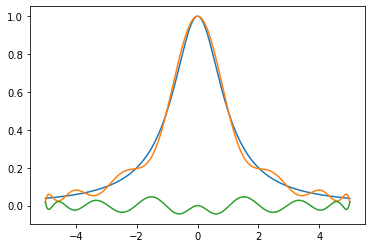

In [14]:
polynom_czebyszew(15)

    W jaki sposób zmienił się błąd interpolacji w porównaniu do wyników z poprzedniego zadania? 
    Czemu tak się stało?

    Wykres błędu interpolacji zmienił się w porównaniu do poprzedniego 
    zadania. 
    Teraz błąd jest mniejszy. Stało się to dlatego, ponieważ funkcja 
    interpolująca - p(x) jest lepiej określona na krańcach przedziału - jest "bliżej" funkcji interpolowanej f(x). 
    Pogarszanie się przybliżenia wielomianu interpolacyjnego wraz ze 
    zwiększającą się ilością węzłów jest nazywane efektem Rungego. 
    Użycie węzłów Czebyszewa minimalizuje ten efekt, ponieważ na końcach 
    przedziału jest ich więcej (większe zagęszczenie).

### Zadanie 3
    Mając daną elipsę w postaci parametrycznej,wykonaj jej interpolację 
    sześciennymi funkcjami sklejanymi dla 10 równoodległych wartości ti. 
    Interpolację wykonaj osobno dla zbiorów punktów (ti, xi) oraz 
    (ti, yi), a następnie narysuj przybliżenie powyższej elipsy 
    używając wyznaczonych funkcji dla 30 punktów.

In [17]:
from scipy.interpolate import interp1d

In [18]:
def x(a,t):
    return a*np.cos(t)

def y(b,t):
    return b*np.sin(t)

def fancy_interpolation(a,b,n):
    ti=np.linspace(0,2*np.pi,n)
    xs=x(a,ti) 
    ys=y(b,ti)
    x_spl=interp1d(ti,xs,kind='cubic')
    y_spl=interp1d(ti,ys,kind='cubic')

    arg=np.linspace(0,2*np.pi,30)
    plt.plot(x_spl(arg),y_spl(arg))
    plt.show()

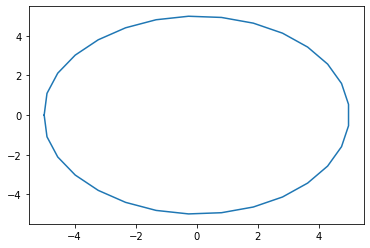

In [19]:
fancy_interpolation(-5,5,10)

## Wnioski

    Na podstawie wykonanych ćwiczeń, można wyciągnąć wnioski, że 
    najlepszym sposobem na interpolację krzywej jest użycie funkcji 
    sklejanych. 
    Jak widać na wykresach, wykres elipsy w zad. 3 przy 30 punktach jest 
    całkiem dokładny, a zatem błąd interpolacji jest niewielki. 
    
    Drugim, co do dokładności sposobem interpolacji jest interpolacja 
    przy pomocy wielomianu interpolacyjnego z użyciem węzłów Czebyszewa.
    Błąd w tym przypadku był mniejszy niż w interpolacji w "zwykłych" 
    węzłach.
    